#**Project 2: Timeseries Prediction using Deep Learning Models**

The S&P 500 dataset is a comprehensive collection of financial data that encompasses the performance of 500 leading companies listed on major stock exchanges in the United States. This dataset typically includes essential variables such as daily stock prices, market capitalization, trading volumes, and sector-wise classifications of the constituent companies. The data is often sourced from reputable financial information providers, such as Bloomberg, Yahoo Finance, or other market data platforms. Analysis of the S&P 500 dataset is crucial for investors, financial analysts, and researchers to understand trends in the broader stock market, assess the health of the economy, and make informed investment decisions. As a senior student of data science at the University of Tampa, delving into this dataset could provide valuable insights for both academic research and real-world applications, aligning with your interest in data science and potentially contributing to your goals in the field.






## Load and Explore Data

In [ ]:
#mounting Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


### JP load data

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/DSC201/Project2/sp500_data.csv')

### Shane load data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/sp500_data.csv")

FileNotFoundError: ignored

## Import libraries +

In [ ]:
data.rename(columns={'Unnamed: 0':'Date'}, inplace=True)

In [ ]:
data['Date']=pd.to_datetime(data['Date']).dt.date
data.set_index("Date",inplace=True)
data.head()

,Open,Close,MACD,RSI,ATR,VIX,USDX,EFFR,UNRATE,UMCSENT
Date,,,,,,,,,,
2006-01-03,1248.290039,1268.800049,0.000000,100.0,24.479980,11.14,89.839996,4.34,4.7,91.2
2006-01-04,1268.800049,1273.459961,-0.371731,100.0,23.276411,11.37,89.139999,4.22,4.7,91.2
2006-01-05,1273.459961,1273.479980,-0.660334,100.0,22.085952,11.31,89.330002,4.24,4.7,91.2
2006-01-06,1273.479980,1285.449951,-1.833791,100.0,21.409097,11.00,88.849998,4.22,4.7,91.2
2006-01-09,1285.449951,1290.150024,-3.107204,100.0,20.305596,11.13,89.250000,4.25,4.7,91.2


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use('ggplot')


import tensorflow as tf
%load_ext tensorboard

import warnings
warnings.filterwarnings('ignore')

import os
import datetime as dt

## Data Visualization

###Features


Date - in format: yy-mm-dd

Open - price of the stock at market open (this is NYSE data so all in USD), numeric

High - Highest price reached in the day, numeric

Low Close - Lowest price reached in the day, numeric

Volume - Number of shares traded, numeric

Name - the stock's ticker name,

Plot the timeseries graph for the response variable ( such as close price) and lower triangular correlation matrix.

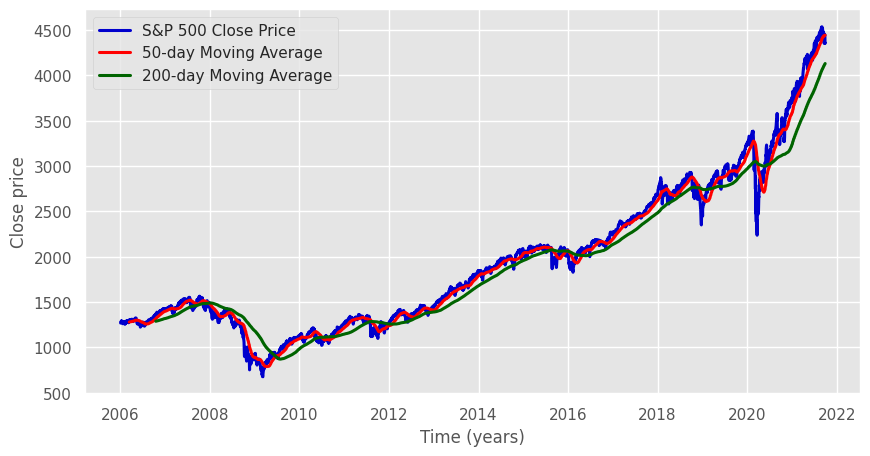

In [ ]:
df = data.copy()
df['MA_50'] = df['Close'].rolling(50).mean()
df['MA_200'] = df['Close'].rolling(200).mean()

fig = plt.figure(figsize=(10,5))
fig.set(facecolor = "white")
plt.plot(df['Close'], 'mediumblue',label=['S&P 500 Close Price'], linewidth = 2.2)
plt.plot(df['MA_50'],'red', label=['50-day MA'], linewidth = 2.2)
plt.plot(df['MA_200'],'darkgreen', label=['200-day MA'], linewidth = 2.2)
plt.legend(['S&P 500 Close Price', '50-day Moving Average', '200-day Moving Average'], loc='upper left')
plt.title('')
plt.xlabel('Time (years)')
plt.ylabel('Close price')
#fig.savefig(output_dir_path+ "original_data_plus_moving_averages.png",dpi=600)
plt.show()

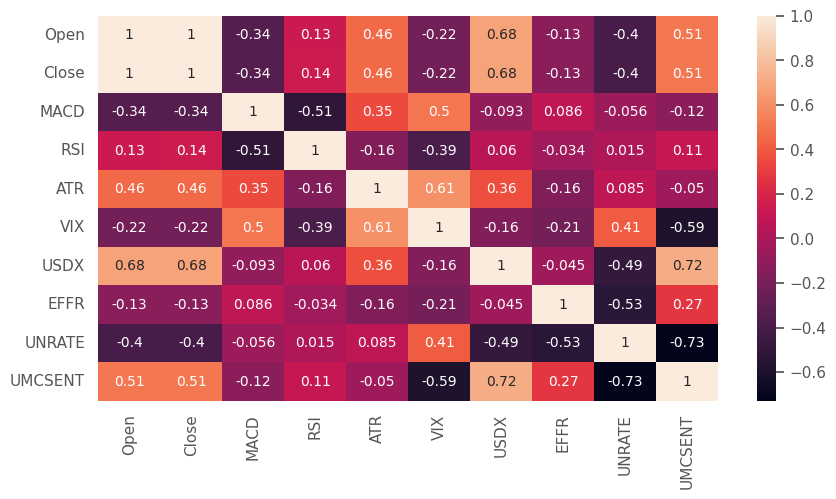

In [ ]:
fig = plt.figure(figsize= (10,5))
sns.heatmap(data.corr(), annot=True)
sns.set_style("whitegrid")
#fig.savefig(output_dir_path+"correlation_heatmap.png",dpi=600)

Because of the correlation between Open and Close, the Open variable is removed. See below:

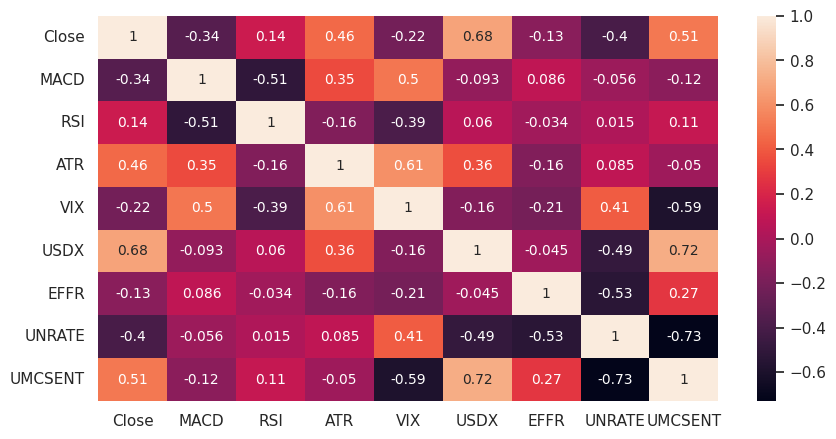

In [ ]:
data = data.iloc[:, 1:]
fig = plt.figure(figsize= (10,5))
sns.heatmap(data.corr(), annot=True)
sns.set_style("whitegrid")
#fig.savefig(output_dir_path+"correlation_heatmap2.png",dpi=600)

In [ ]:
data.describe()

,Close,MACD,RSI,ATR,VIX,USDX,EFFR,UNRATE,UMCSENT
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,1962.393673,-5.621450,55.826676,24.002431,19.516902,87.126609,1.183173,6.284575,82.478036
std,839.218330,23.181250,15.579952,16.179032,9.416872,8.198082,1.649540,2.168430,11.950085
min,676.530029,-90.703036,7.143979,8.580663,9.140000,71.330002,0.040000,3.500000,55.300000
25%,1309.930054,-16.398778,44.981757,14.304538,13.350000,80.199997,0.100000,4.600000,73.500000
50%,1770.609985,-8.014573,57.488593,18.556936,16.799999,85.699997,0.190000,5.600000,82.700000
75%,2507.040039,3.155731,67.633058,27.855653,22.540001,95.010002,1.910000,8.100000,93.100000
max,4536.950195,237.020227,100.000000,152.756467,82.690002,103.290001,5.410000,14.800000,101.400000


In [ ]:
data.shape

(3961, 9)

##Dimension Reduction using PCA


Use pca to capture maximum variance ( let's say 0.95 or 0.99) and use reduced number of dimensions (features) as a input X. The y sequence is the original response variable.

In [ ]:
X = data.drop(columns=['Close'])  # features
y = data['Close']  # response variable

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99) #can try 99% as well- got 6, same
X_pca = pca.fit_transform(X)

In [ ]:
pca.n_components_

6

The dimensionalty of the data set has been reduced from 9 to 6. These 6 principal components capture a majority of the important information from the original features.

##Data Normalization and Input Preparation

Split the X and y into train/test and then normalize X_train/X_test.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the PCA-transformed data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# normalize PCA-transformed train/test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

Make LSTM model taking same number of neurons as your assigned paper. Use same activation for the hidden layer as stated in the paper. (Use github code that is available in 2nd paper) -GRU included but not ran

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
import math

####Supporting Functions from LSTM-SDM_Code implementation

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return (np.mean(np.abs((y_true - y_pred)/(y_true))*100)) #some issues with zero denominator

def calculate_scores(y_true, y_pred):
  rmse = math.sqrt(mean_squared_error(y_true, y_pred))
  #R2_score = r2_score(y_true, y_pred)
  R = np.corrcoef(y_true, y_pred)
  #mae = mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  #dic = {'rmse':rmse, 'R2_score': R2_score, 'R':R[0,1], 'mae': mae, 'mape': mape}
  dic = {'rmse':rmse, 'R': R[0,1], 'mape': mape}
  return (dic)



def DatasetCreation(dataset, time_step = 1):  ##defining a function that gives a dataset and a time step, which then returns the input and output data
   DataX, DataY = [], []
   for i in range(len(dataset)- time_step -1):
         a = dataset[i:(i+ time_step), ]
         DataX.append(a)
         DataY.append(dataset[i + time_step, 0]) #ydata consists close price
   return np.array(DataX), np.array(DataY)


def data_split(data, split = 0.2):
  #======= creating training and test data===#
  l1   = int(len(data) * (1- split))
  l2    = len(data) - l1
  data1  = data.iloc[0:l1,:]
  data2   = data.iloc[l1:len(data),:]
  return data1, data2

def min_max_transform(data, feature_range=(0, 1)):
   scaler = MinMaxScaler(feature_range)
   return scaler.fit_transform(data)

def min_max_inverse_transform(data_scaled, min_original, max_original):
    return min_original +  data_scaled*(max_original - min_original)



def write_dic_to_file(dic_name, file_name):
  file = open(file_name, 'w')
  file.write(str(dic_name))
  file.close()

import ast
def read_dic_from_file(file_name):
  file = open(file_name, "r")
  contents = file.read()
  dictionary = ast.literal_eval(contents)
  file.close()
  return dictionary

###LSTM Model

In [ ]:
def build_model_LSTM (layers, time_step, num_features, optimizer = 'Adam', learning_rate = 0.001, verbose = 1):

  model = Sequential()

  for i in range(len(layers)):
    if len(layers)==1:
      model.add(LSTM(np.int(layers[i]), input_shape = (time_step, num_features)))
    else:
      if i < len(layers)-1:
        if i == 0:
          model.add(LSTM(np.int(layers[i]), input_shape=(time_step, num_features), return_sequences= True))
          #model.add(Dropout(0.10))
        else:
          model.add(LSTM(np.int(layers[i]), return_sequences=True))
          #model.add(Dropout(0.10))
      else:
        model.add(LSTM(np.int(layers[i])))
        #model.add(Dropout(0.10))
  model.add(Dense(1, activation = 'linear'))

  if optimizer == 'Adam':
    opt = optimizers.Adam(learning_rate = learning_rate)
  elif optimizer == 'Adagrad':
    opt = optimizers.Adagrad(learning_rate = learning_rate)
  elif optimizer == 'Nadam':
    opt = optimizers.Nadam(learning_rate = learning_rate)
  elif optimizer == 'Adadelta':
    opt = optimizers.Adadelta(learning_rate= learning_rate)
  elif optimizer == 'RMSprop':
    opt = optimizers.RMSprop(learning_rate= learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam', 'Adadelta', 'RMSprop'])! Please apply your optimizer manually...")

  model.compile(loss='mean_squared_error', optimizer= opt)

  if verbose == 1:
    print(model.summary())
  return model

In [ ]:

optimizers_names = ['Adam', 'Adagrad', 'Nadam']

build_model_LSTM([250], 5, 10, optimizers_names[2], 0.001, 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250)               261000    
                                                                 
 dense (Dense)               (None, 1)                 251       
                                                                 
Total params: 261251 (1020.51 KB)
Trainable params: 261251 (1020.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### GRU Model

In [ ]:
def build_model_GRU(layers, time_step, num_features, optimizer = 'Adam', learning_rate = 0.001, verbose = 1):

  model = Sequential()

  for i in range(len(layers)):
    if len(layers)==1:
      model.add(LSTM(np.int(layers[i]), input_shape = (time_step, num_features)))
    else:
      if i < len(layers)-1:
        if i == 0:
          model.add(GRU(np.int(layers[i]), input_shape=(time_step, num_features), return_sequences= True))
          #model.add(Dropout(0.10))
        else:
          model.add(LSTM(np.int(layers[i]), return_sequences=True))
          #model.add(Dropout(0.10))
      else:
        model.add(LSTM(np.int(layers[i])))
        #model.add(Dropout(0.10))
  model.add(Dense(1, activation = 'linear'))

  if optimizer == 'Adam':
    opt = optimizers.Adam(learning_rate = learning_rate)
  elif optimizer == 'Adagrad':
    opt = optimizers.Adagrad(learning_rate = learning_rate)
  elif optimizer == 'Nadam':
    opt = optimizers.Nadam(learning_rate = learning_rate)
  elif optimizer == 'Adadelta':
    opt = optimizers.Adadelta(learning_rate= learning_rate)
  elif optimizer == 'RMSprop':
    opt = optimizers.RMSprop(learning_rate= learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam', 'Adadelta', 'RMSprop'])! Please apply your optimizer manually...")

  model.compile(loss='mean_squared_error', optimizer= opt)

  if verbose == 1:
    print(model.summary())
  return model

In [ ]:
optimizers_names = ['Adam', 'Adagrad', 'Nadam']

build_model_GRU([250], 5, 10, optimizers_names[2], 0.001, 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 250)               261000    
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 261251 (1020.51 KB)
Trainable params: 261251 (1020.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Hyperparameter Tuning

Define a hyperparameter tuning function as defined in github and find your best set of hyperparameters. It may take 3-4 hours to run for one set of neurons.

In [ ]:
#JP Dictionary
output_dir_path = '/content/drive/MyDrive/DSC201/Project2/'

### **LSTM**

In [ ]:
def hyper_parameter_tuning_LSTM(layers, data, time_step, split, optimizers_names, learning_rates, batch_sizes, epochs, num_replicates = 2):
  #======= creating training and test data===#
  train_data, val_data = data_split(data, split)

  num_features = train_data.shape[1]

  min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
  min_val, max_val   =    val_data["Close"].min(), val_data["Close"].max()

  train_data_scaled  =  min_max_transform(train_data)
  val_data_scaled    = min_max_transform(val_data)

  X_train, y_train =   DatasetCreation(train_data_scaled, time_step)
  X_val, y_val     =   DatasetCreation(val_data_scaled, time_step)

  #========dealing with time series=========#

  best_avg_rmse = 99999999999
  collect_rmse = []
  all_avg_rmse = np.zeros((len(optimizers_names), len(learning_rates), len(batch_sizes)))

  best_hyper_parameters = {"model": layers, "optimizer": None, "learning_rate": None, "batch_size": None,"best_avg_rmse": None}

  for opt in range(len(optimizers_names)):
    for lr in range(len(learning_rates)):
      for batch_size in range(len(batch_sizes)):
        for i in range(num_replicates):
          print("Running for " + optimizers_names[opt] + " optimizer " + str(learning_rates[lr]) +  " learning_rate " +  str(batch_sizes[batch_size]) + " batch_size and " + str(i) +  " replicate " +  "\n")
          model = build_model_LSTM(layers, time_step, num_features, optimizers_names[opt], learning_rate = learning_rates[lr], verbose = 0)
          callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)
          history = model.fit(X_train, y_train, batch_size = batch_sizes[batch_size], epochs= epochs, validation_data = (X_val, y_val), callbacks=[callback], verbose = 1)

          #==============Making predictions in original scale ==========

          val_pred    =  min_max_inverse_transform(model.predict(X_val).ravel(), min_val, max_val)

          collect_rmse.append(math.sqrt(mean_squared_error(min_max_inverse_transform(y_val, min_val, max_val),val_pred)))

        avg_rmse = np.mean(np.array(collect_rmse))
        all_avg_rmse[opt][lr][batch_size] = avg_rmse

        if avg_rmse < best_avg_rmse:
          best_avg_rmse = avg_rmse
          best_hyper_parameters = {"model": layers,  "optimizer": optimizers_names[opt], "learning_rate": learning_rates[lr], "batch_size": batch_sizes[batch_size], "best_avg_rmse": best_avg_rmse}


  output_dictionary = {
      "best_hyper_parameters":  best_hyper_parameters,
      "all_avg_rmse": all_avg_rmse
       }

  #writing output dictionary in the file

  file_name = output_dir_path + "LSTM" + str(layers[0]) + "-validation_results" + ".txt"
  write_dic_to_file(output_dictionary, file_name)

  print("Best_hyper_parameters: \n", output_dictionary['best_hyper_parameters'])
  print("all_avg_rmse: \n", output_dictionary['all_avg_rmse'])

  return output_dictionary['best_hyper_parameters']


Checker code- make sure model works

In [ ]:
layers = [10]
time_step = 5
optimizers_names = ['Adam']
learning_rates =  [0.1]
batch_sizes =  [16]
epochs = 3
num_replicates = 2
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

LSTMp = hyper_parameter_tuning_LSTM(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

ACTUAL RUNS

In [ ]:
layers = [10]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

LSTM10 = hyper_parameter_tuning_LSTM(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
LSTM10

Streaming output truncated to the last 5000 lines.
632/632 [==============================] - 4s 6ms/step - loss: 0.0076 - val_loss: 0.0330
Epoch 23/50
632/632 [==============================] - 3s 5ms/step - loss: 0.0072 - val_loss: 0.0326
Epoch 24/50
632/632 [==============================] - 4s 6ms/step - loss: 0.0068 - val_loss: 0.0321
Epoch 25/50
632/632 [==============================] - 4s 6ms/step - loss: 0.0064 - val_loss: 0.0317
Epoch 26/50
632/632 [==============================] - 4s 6ms/step - loss: 0.0061 - val_loss: 0.0313
Epoch 27/50
632/632 [==============================] - 4s 6ms/step - loss: 0.0058 - val_loss: 0.0310
Epoch 28/50
632/632 [==============================] - 3s 5ms/step - loss: 0.0055 - val_loss: 0.0306
Epoch 29/50
632/632 [==============================] - 3s 6ms/step - loss: 0.0053 - val_loss: 0.0302
Epoch 30/50
632/632 [==============================] - 4s 6ms/step - loss: 0.0051 - val_loss: 0.0298
Epoch 31/50
632/632 [==============================]

{'model': [10],
 'optimizer': 'Adagrad',
 'learning_rate': 0.1,
 'batch_size': 16,
 'best_avg_rmse': 38.503806930555044}

**Best_hyper_parameters:
 {'model': [10], 'optimizer': 'Adagrad', 'learning_rate': 0.1, 'batch_size': 16, 'best_avg_rmse': 38.503806930555044}**

In [ ]:
layers = [30]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

LSTM30 = hyper_parameter_tuning_LSTM(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

**'best_hyper_parameters': {'model': [30], 'optimizer': 'Adagrad', 'learning_rate': 0.01, 'batch_size': 8, 'best_avg_rmse': 34.68476944606469},**

In [ ]:
layers = [50]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

LSTM50 = hyper_parameter_tuning_LSTM(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

**{'best_hyper_parameters': {'model': [50], 'optimizer': 'Adagrad', 'learning_rate': 0.01, 'batch_size': 8, 'best_avg_rmse': 34.66815496031855},**

In [ ]:
layers = [100]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

LSTM100 = hyper_parameter_tuning_LSTM(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

Streaming output truncated to the last 5000 lines.
Epoch 26/50
632/632 [==============================] - 4s 7ms/step - loss: 6.1945e-04 - val_loss: 0.0049
Epoch 27/50
632/632 [==============================] - 4s 7ms/step - loss: 6.0434e-04 - val_loss: 0.0049
Epoch 28/50
632/632 [==============================] - 5s 7ms/step - loss: 5.9077e-04 - val_loss: 0.0048
Epoch 29/50
632/632 [==============================] - 4s 6ms/step - loss: 5.7871e-04 - val_loss: 0.0047
Epoch 30/50
632/632 [==============================] - 4s 7ms/step - loss: 5.6805e-04 - val_loss: 0.0046
Epoch 31/50
632/632 [==============================] - 4s 7ms/step - loss: 5.5871e-04 - val_loss: 0.0046
Epoch 32/50
632/632 [==============================] - 4s 7ms/step - loss: 5.5005e-04 - val_loss: 0.0045
Epoch 33/50
632/632 [==============================] - 4s 7ms/step - loss: 5.4263e-04 - val_loss: 0.0045
Epoch 34/50
632/632 [==============================] - 4s 6ms/step - loss: 5.3602e-04 - val_loss: 0.0044
Epoc

**{'best_hyper_parameters': {'model': [100], 'optimizer': 'Adagrad', 'learning_rate': 0.01, 'batch_size': 16, 'best_avg_rmse': 41.21748924435726}**

In [ ]:
layers = [150]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

LSTM150 = hyper_parameter_tuning_LSTM(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

**{'best_hyper_parameters': {'model': [150], 'optimizer': 'Adagrad', 'learning_rate': 0.01, 'batch_size': 16, 'best_avg_rmse': 49.25603137914322},**

In [ ]:
layers = [200]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

LSTM200 = hyper_parameter_tuning_LSTM(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

Running for Adam optimizer 0.1 learning_rate 4 batch_size and 0 replicate 

Epoch 1/50
632/632 [==============================] - 10s 13ms/step - loss: 0.4702 - val_loss: 0.0027
Epoch 2/50
632/632 [==============================] - 7s 10ms/step - loss: 0.0010 - val_loss: 0.0032
Epoch 3/50
632/632 [==============================] - 8s 13ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 4/50
632/632 [==============================] - 6s 10ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 5/50
632/632 [==============================] - 8s 12ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 6/50
632/632 [==============================] - 6s 10ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 7/50
632/632 [==============================] - 8s 13ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 8/50
632/632 [==============================] - 6s 10ms/step - loss: 9.7875e-04 - val_loss: 0.0012
Epoch 9/50
632/632 [==============================] - 8s 13ms/step - loss: 0.0021 - val_loss: 8.0947e-04
Epoch 

**{'best_hyper_parameters': {'model': [200], 'optimizer': 'Adagrad', 'learning_rate': 0.001, 'batch_size': 4, 'best_avg_rmse': 58.4475616033558}**

### **GRU**

In [ ]:
def hyper_parameter_tuning_GRU(layers, data, time_step, split, optimizers_names, learning_rates, batch_sizes, epochs, num_replicates = 2):
  #======= creating training and test data===#
  train_data, val_data = data_split(data, split)

  num_features = train_data.shape[1]

  min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
  min_val, max_val   =    val_data["Close"].min(), val_data["Close"].max()

  train_data_scaled  =  min_max_transform(train_data)
  val_data_scaled    = min_max_transform(val_data)

  X_train, y_train =   DatasetCreation(train_data_scaled, time_step)
  X_val, y_val     =   DatasetCreation(val_data_scaled, time_step)

  #========dealing with time series=========#

  best_avg_rmse = 99999999999
  collect_rmse = []
  all_avg_rmse = np.zeros((len(optimizers_names), len(learning_rates), len(batch_sizes)))
  best_hyper_parameters = {"model": layers, "optimizer": None, "learning_rate": None, "batch_size": None,"best_avg_rmse": None}
  for opt in range(len(optimizers_names)):
    for lr in range(len(learning_rates)):
      for batch_size in range(len(batch_sizes)):
        for i in range(num_replicates):
          print("Running for " + optimizers_names[opt] + " optimizer " + str(learning_rates[lr]) +  " learning_rate " +  str(batch_sizes[batch_size]) + " batch_size and " + str(i) +  " replicate " +  "\n")
          model = build_model_GRU(layers, time_step, num_features, optimizers_names[opt], learning_rate = learning_rates[lr], verbose = 0)
          callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)
          history = model.fit(X_train, y_train, batch_size = batch_sizes[batch_size], epochs= epochs, validation_data = (X_val, y_val), callbacks=[callback], verbose = 1)

          #==============Making predictions in original scale ==========

          val_pred    =  min_max_inverse_transform(model.predict(X_val).ravel(), min_val, max_val)
          collect_rmse.append(math.sqrt(mean_squared_error(min_max_inverse_transform(y_val, min_val, max_val),val_pred)))
        avg_rmse = np.mean(np.array(collect_rmse))
        all_avg_rmse[opt][lr][batch_size] = avg_rmse

        if avg_rmse < best_avg_rmse:
          best_avg_rmse = avg_rmse
          best_hyper_parameters = {"model": layers,  "optimizer": optimizers_names[opt], "learning_rate": learning_rates[lr], "batch_size": batch_sizes[batch_size], "best_avg_rmse": best_avg_rmse}


  output_dictionary = {
      "best_hyper_parameters":  best_hyper_parameters,
      "all_avg_rmse": all_avg_rmse
       }

  #writing output dictionary in the file

  file_name = output_dir_path + "GRU" + str(layers[0]) + "-validation_results" + ".txt"
  write_dic_to_file(output_dictionary, file_name)

  print("Best_hyper_parameters: \n", output_dictionary['best_hyper_parameters'])
  print("all_avg_rmse: \n", output_dictionary['all_avg_rmse'])

  return output_dictionary['best_hyper_parameters']


Checker Code

In [ ]:
layers = [10]
time_step = 5
optimizers_names = ['Adam']
learning_rates =  [0.1]
batch_sizes =  [16]
epochs = 3
num_replicates = 2
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

GruP = hyper_parameter_tuning_GRU(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

Actual Runs

In [ ]:
layers = [10]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

GRU10 = hyper_parameter_tuning_GRU(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

{'best_hyper_parameters': {'model': [10], 'optimizer': 'Adam', 'learning_rate': 0.1, 'batch_size': 16, 'best_avg_rmse': 77.49598521939416}

In [ ]:
layers = [30]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

GRU30 = hyper_parameter_tuning_GRU(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

{'best_hyper_parameters': {'model': [30], 'optimizer': 'Adagrad', 'learning_rate': 0.01, 'batch_size': 8, 'best_avg_rmse': 33.53992942957831}

In [ ]:
layers = [50]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

GRU50 = hyper_parameter_tuning_GRU(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

In [ ]:
layers = [100]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

GRU100 = hyper_parameter_tuning_GRU(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

In [ ]:
layers = [150]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

GRU150 = hyper_parameter_tuning_GRU(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

In [ ]:
layers = [200]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

GRU200 = hyper_parameter_tuning_GRU(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)

## Best Model Selection

There will be two types of comparison:
* 1. Which neurons gives you the best
result in LSTM?
* 2. Then out of the best model from each architecture, which one is the overall best model?

### Running LSTM with best models from nuerons 10,30,50,100,150,*200*

In [ ]:
#========== Model hyper parameters settting ==========================#
def LSTM_model(neurons, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 20,  num_replicates = 2):

  #====== data transformation==========#
  print("Progress: Performing data preparation steps.......\n")

  #======= creating training and test data===#

  train_data, test_data = data_split(data, test_split)

  num_features = train_data.shape[1]

  min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
  min_test, max_test   =  test_data["Close"].min(), test_data["Close"].max()

  train_data_scaled  =  min_max_transform(train_data)
  test_data_scaled   = min_max_transform(test_data)


  X_train, y_train  =   DatasetCreation(train_data_scaled, time_step)
  X_test, y_test    =   DatasetCreation(test_data_scaled, time_step)

  y_train_original  =  min_max_inverse_transform(y_train, min_train, max_train) #in original scale
  y_test_original  =  min_max_inverse_transform(y_test, min_test, max_test) #in original scale


  print("Progress: Building and training models.......\n")

  neurons = np.array(neurons)
  #============ arrays for collecting test scores ================#
  rmse_array = np.zeros((len(neurons), num_replicates))
  #mae_array  = np.zeros((len(neurons), num_replicates))
  mape_array = np.zeros((len(neurons), num_replicates))
  #R2_array   = np.zeros((len(neurons), num_replicates))
  R_array    = np.zeros((len(neurons), num_replicates))
  elapsed_time_array = np.zeros((len(neurons), num_replicates))


  #========== array for collecting history and predictions =======#
  models_history = []
  train_predictions = []
  test_predictions  = []

  for i in range(len(neurons)):

    print("Model hyperparameters used: \n ", hyper_parameters[i])
    #========== saving history and predictions per replicate=====#
    model_history_per_replicate = []
    train_predictions_per_replicate = []
    test_predictions_per_replicate  = []

    hidden_nodes = np.int(neurons[i])

   # print("Program is running for %d neurons ----->\n" %np.int(neurons[i]))


    for k in range(num_replicates):

      print("Program is running for %d neurons and %d replicate ----->\n" %(hidden_nodes, k))



      layers = [hidden_nodes]


      model = build_model_LSTM(layers, time_step, num_features, optimizer = hyper_parameters[i][0], learning_rate = hyper_parameters[i][1], verbose = 0)
      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
      # This callback will stop the training when there is no improvement in
      # the loss for three consecutive epochs
      start = time.time()
      history = model.fit(X_train, y_train, batch_size = hyper_parameters[i][2], epochs= epochs, callbacks=[callback], verbose = 1)
      end = time.time()
      elapsed_time = end - start

      model_history_per_replicate.append(history)


      #==============Making train and test prediction in original scales ==========
      train_pred   =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train) #in original scale
      test_pred    =  min_max_inverse_transform(model.predict(X_test).ravel(), min_test, max_test)

      train_predictions_per_replicate.append(train_pred)
      test_predictions_per_replicate.append(test_pred)

      #============== Calculating performance scores=========
      scores =   calculate_scores(min_max_inverse_transform(y_test, min_test, max_test),test_pred)
      rmse_array[i][k] = scores['rmse']
      mape_array[i][k] =  scores['mape']
      R_array[i][k] = scores['R']
      elapsed_time_array[i][k] = elapsed_time

    models_history.append(model_history_per_replicate)
    train_predictions.append(train_predictions_per_replicate)
    test_predictions.append(test_predictions_per_replicate)

  print("Progress: Collecting outputs.......\n")

  neurons_df = pd.DataFrame(neurons)
  rmse_df = pd.DataFrame(rmse_array)
  #mae_df  = pd.DataFrame(mae_array)
  mape_df  = pd.DataFrame(mape_array)
  #R2_df   = pd.DataFrame(R2_array)
  R_df    = pd.DataFrame(R_array)
  elapsed_time_df =  pd.DataFrame(elapsed_time_array)

  train_predictions  = np.array(train_predictions)
  test_predictions   = np.array(test_predictions)

  #==== Idendifying  the best model results based on rmse ===============#
  min_index = pd.DataFrame(rmse_df.min(axis = 1)).idxmin()[0]
  min_col =   pd.DataFrame(rmse_df.min(axis = 0)).idxmin()[0]

  num_neurons_with_best_rmse = neurons_df.loc[min_index,0]

  best_rmse = rmse_df.loc[min_index, min_col]
  #mae_with_best_rmse = mae_df.loc[min_index, min_col]
  mape_with_best_rmse = mape_df.loc[min_index, min_col]
  #R2_with_best_rmse = R2_df.loc[min_index, min_col]
  R_with_best_rmse =  R_df.loc[min_index, min_col]
  elapsed_time_with_best_rmse = elapsed_time_df.loc[min_index, min_col]

  train_predictions_with_best_rmse = train_predictions[min_index][min_col]
  test_predictions_with_best_rmse = test_predictions[min_index][min_col]

  loss_with_best_rmse = models_history[min_index][min_col].history['loss']
  #val_loss_with_best_rmse = models_history[min_index][min_col].history['val_loss']

  #======= Collecting hyperparameters=============#
  hyper_parameters = { 'neurons': neurons,
                       'model_specific_hyper_parameters': hyper_parameters,#additional best_hyper_parmeters for each models
                       'epochs': epochs,
                       'time_step':time_step,
                       'num_replicates': num_replicates,
                       'test_split':test_split
                       #'validataion_split':validation_split
                        }

  #======= Collecting test scores =============#
  scores = {'neurons': neurons_df, 'rmse': rmse_df, 'mape': mape_df, 'R': R_df, 'elapsed_time': elapsed_time_df}

  #======= Collecting average test scores =============#
  avg_scores = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.mean(axis = 1),
                            'mape': mape_df.mean(axis = 1),
                            'R': R_df.mean(axis = 1),
                            'elapsed_time': elapsed_time_df.mean(axis = 1)})

 #======= Collecting average test scores =============#
  all_stds = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.std(axis = 1),
                            'mape': mape_df.std(axis = 1),
                            'R': R_df.std(axis = 1),
                            'elapsed_time': elapsed_time_df.std(axis = 1)})
  #======= Collecting average test scores =============#
  all_minimums = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.min(axis = 1),
                            'mape': mape_df.min(axis = 1),
                            'R': R_df.min(axis = 1),
                            'elapsed_time': elapsed_time_df.min(axis = 1)})

  #======= Collecting average test scores =============#
  all_maximums = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.max(axis = 1),
                            'mape': mape_df.max(axis = 1),
                            'R': R_df.max(axis = 1),
                            'elapsed_time': elapsed_time_df.max(axis = 1)})



  #======= Collecting the best model results =============#
  model_with_best_rmse = {  'neurons': num_neurons_with_best_rmse,
                            'replicate': min_col,
                            'rmse': best_rmse,
                            'mape': mape_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            'loss':loss_with_best_rmse,

                         }

  datasets  =    {'data': data,
                  'X_train': X_train,
                  'X_test': X_test,
                  'y_train': y_train_original,
                  'y_test': y_test_original
                  }

  #======= Collecting all the outputs together =============#
  output_dictionary = { 'hyper_parameters': hyper_parameters,
                        'best_model': model_with_best_rmse,
                        'scores': scores,
                        'avg_scores': avg_scores,
                        'all_stds': all_stds,
                        'all_minimums': all_minimums,
                        'all_maximums': all_maximums,
                        'train_predictions': train_predictions,
                        'test_predictions':  test_predictions,
                        'models_history': models_history,
                        'datasets': datasets
                       }

  print("\nBest model (neurons, replicate, rmse): ", num_neurons_with_best_rmse, min_col, best_rmse)
  print('\nAverage scores:\n', avg_scores)
  print('\nStandard_deviations:\n', all_stds)
  print('\nMinimums:\n', all_minimums)
  print('\nMaximums:\n', all_maximums)
  print("\nProgress: All works are done successfully, congratulations!!\n")



  #Save all rmses in a file for statistical study
  scores['rmse'].to_csv(output_dir_path+'sl-lstm-all-rmse.csv')

  #writing output dictionary in the file
  file_name = output_dir_path + "sl-lstm-results.txt"
  write_dic_to_file(output_dictionary, file_name)

  return (output_dictionary)

In [ ]:
neurons = np.array([10, 30, 50, 100, 150,200])

best_hyper_parameters = [['Adagrad', 0.1, 16],# 10N model
                      ['Adagrad', 0.01, 8], # 30N model
                      ['Adagrad', 0.01, 8], # 50N model
                      ['Adagrad', 0.01, 16], # 1000N model
                      ['Adagrad', 0.01, 16], # 150N model -change
                      ['Adagrad', 0.001, 4] # 200N model - change
                   ]


LSTM_model_output = LSTM_model(neurons, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 100, num_replicates = 30)
#LSTM_model_output = LSTM_model(neurons, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 2, num_replicates = 3) #TESTER

Streaming output truncated to the last 5000 lines.
396/396 [==============================] - 3s 7ms/step - loss: 1.6753e-04
Epoch 18/100
396/396 [==============================] - 3s 8ms/step - loss: 1.5820e-04
Epoch 19/100
396/396 [==============================] - 3s 8ms/step - loss: 1.4952e-04
Epoch 20/100
396/396 [==============================] - 3s 9ms/step - loss: 1.4210e-04
Epoch 21/100
396/396 [==============================] - 3s 8ms/step - loss: 1.3536e-04
Epoch 22/100
396/396 [==============================] - 3s 8ms/step - loss: 1.2918e-04
Epoch 23/100
396/396 [==============================] - 3s 7ms/step - loss: 1.2434e-04
Epoch 24/100
396/396 [==============================] - 3s 8ms/step - loss: 1.2000e-04
Epoch 25/100
396/396 [==============================] - 3s 8ms/step - loss: 1.1571e-04
Epoch 26/100
396/396 [==============================] - 3s 9ms/step - loss: 1.1262e-04
Epoch 27/100
396/396 [==============================] - 3s 8ms/step - loss: 1.0843e-04
Epoch

kept failing so 2 were run at a time in seperate files- final of each output below

**10 and 30 Nuerons**

In [ ]:
neurons = np.array([10, 30])

best_hyper_parameters = [['Adagrad', 0.1, 16],# 10N model
 ['Adagrad', 0.01, 8] ] # 30N model


LSTM_model_output1030 = LSTM_model(neurons, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 100, num_replicates = 30)



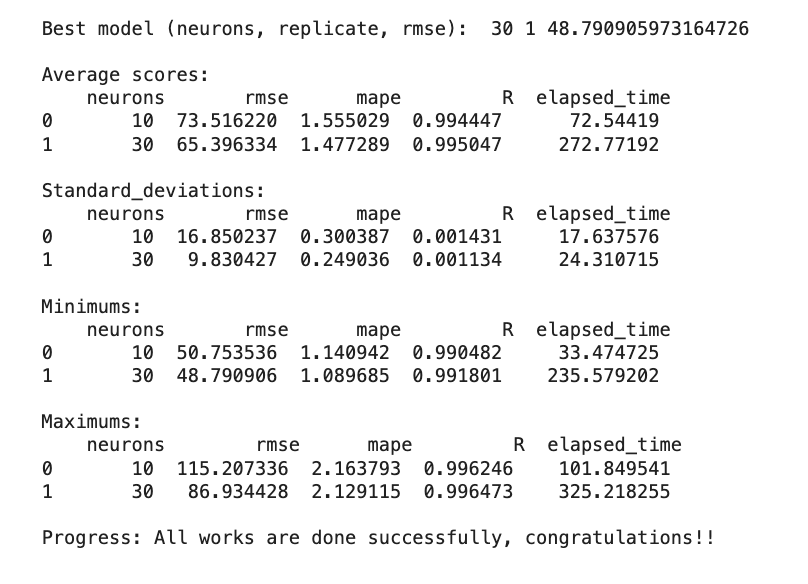

**50 and 100 Nuerons**

In [ ]:
neurons = np.array([50, 100])

best_hyper_parameters = [
                      ['Adagrad', 0.01, 8], # 50N model
                      ['Adagrad', 0.01, 16], # 1000N model

                   ]


LSTM_model_output50100 = LSTM_model(neurons, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 100, num_replicates = 30)

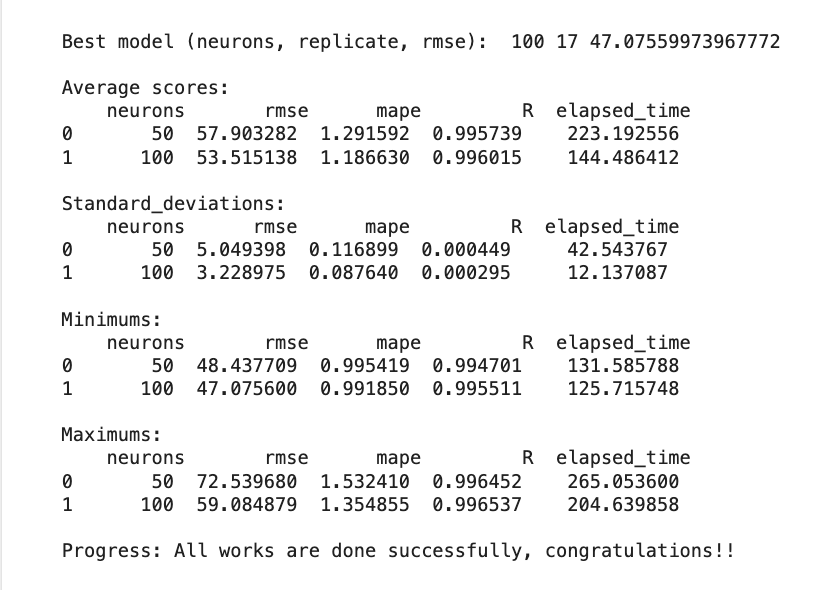

**150 and 200 Nuerons**

In [ ]:
neurons = np.array([150,200])

best_hyper_parameters = [
                      ['Adagrad', 0.01, 16], # 150N model -change
                      ['Adagrad', 0.001, 4] # 200N model - change
                   ]


LSTM_model_output150200 = LSTM_model(neurons, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 100, num_replicates = 30

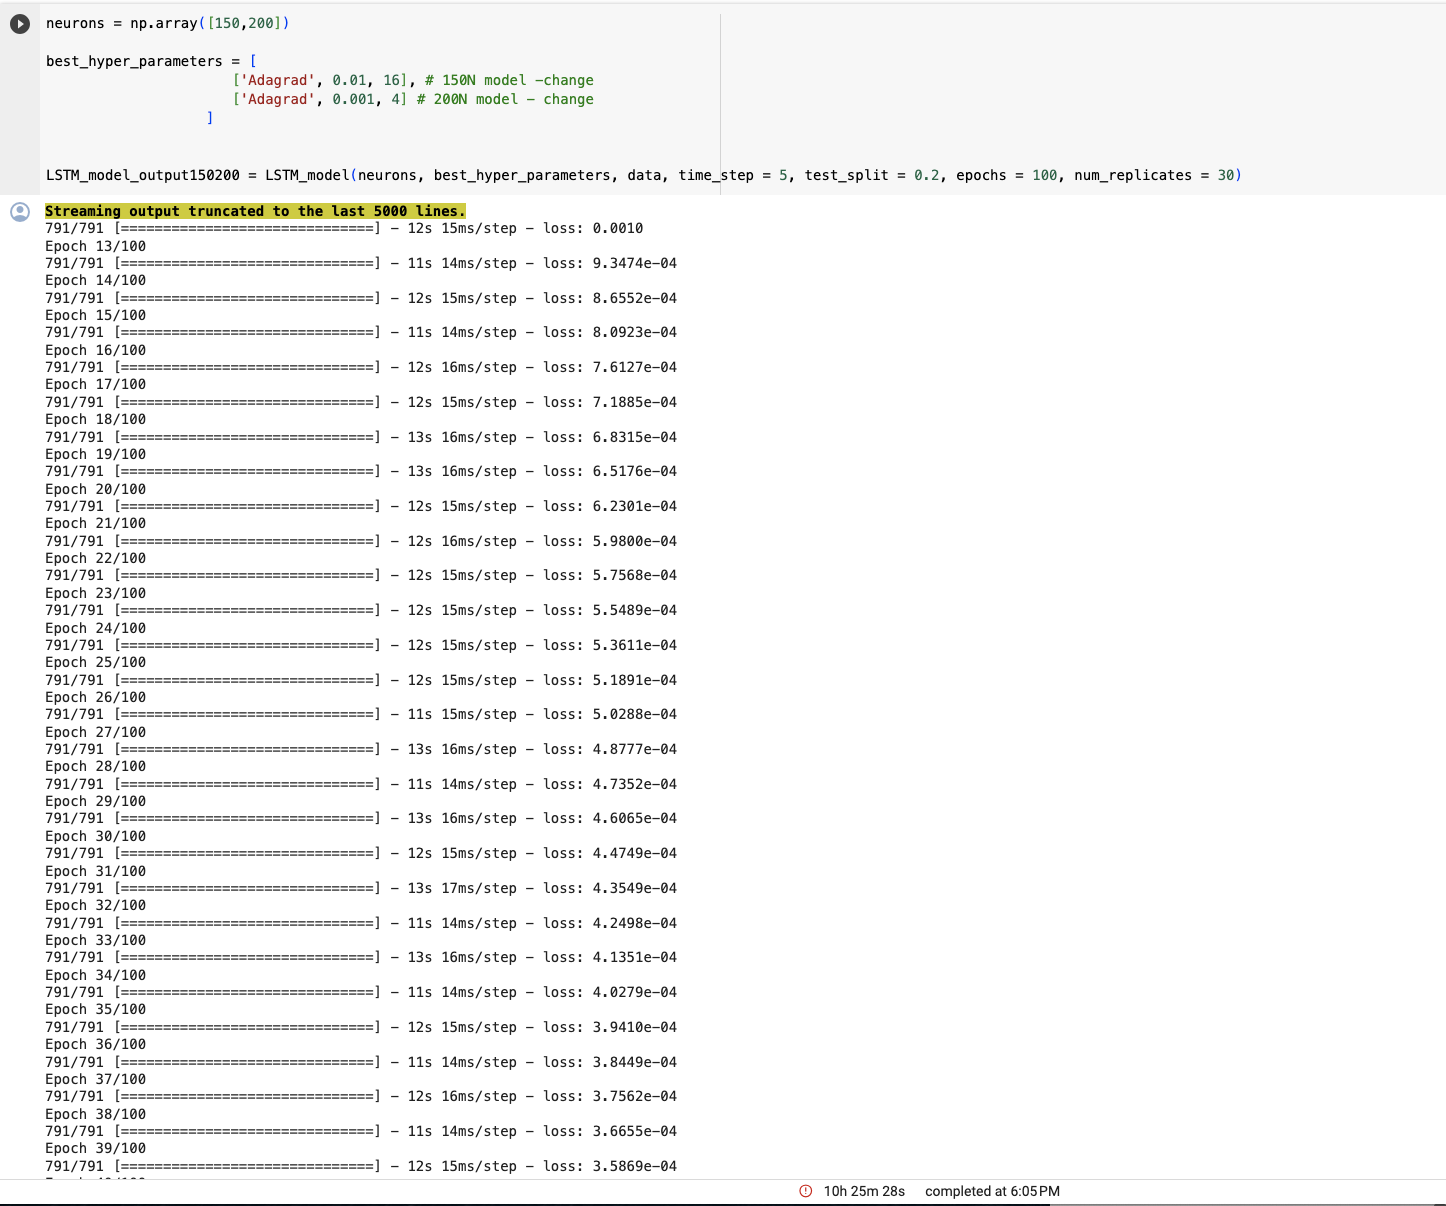

Runtime FAILED after 10hr and 25 minutes so ran seperatly

**150**

In [ ]:
neurons = np.array([150])

best_hyper_parameters = [
                      ['Adagrad', 0.01, 16], # 150N model -change

                   ]


LSTM_model_output150 = LSTM_model(neurons, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 100, num_replicates = 30)

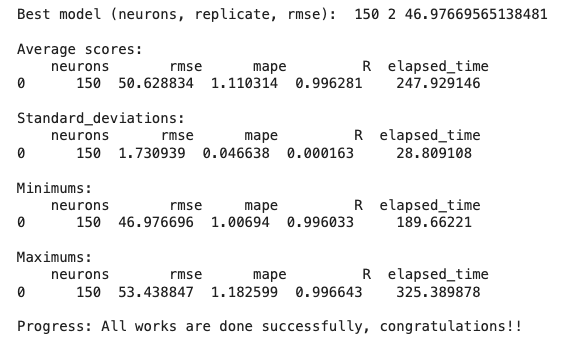

**200**

In [ ]:
neurons = np.array([200])

best_hyper_parameters = [
                      ['Adagrad', 0.001, 4] # 200N model - change
                   ]


LSTM_model_output200 = LSTM_model(neurons, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 100, num_replicates = 30)

code was ran and failed multiple times- it was decided this cannot be the best model if it is so computationally expensive

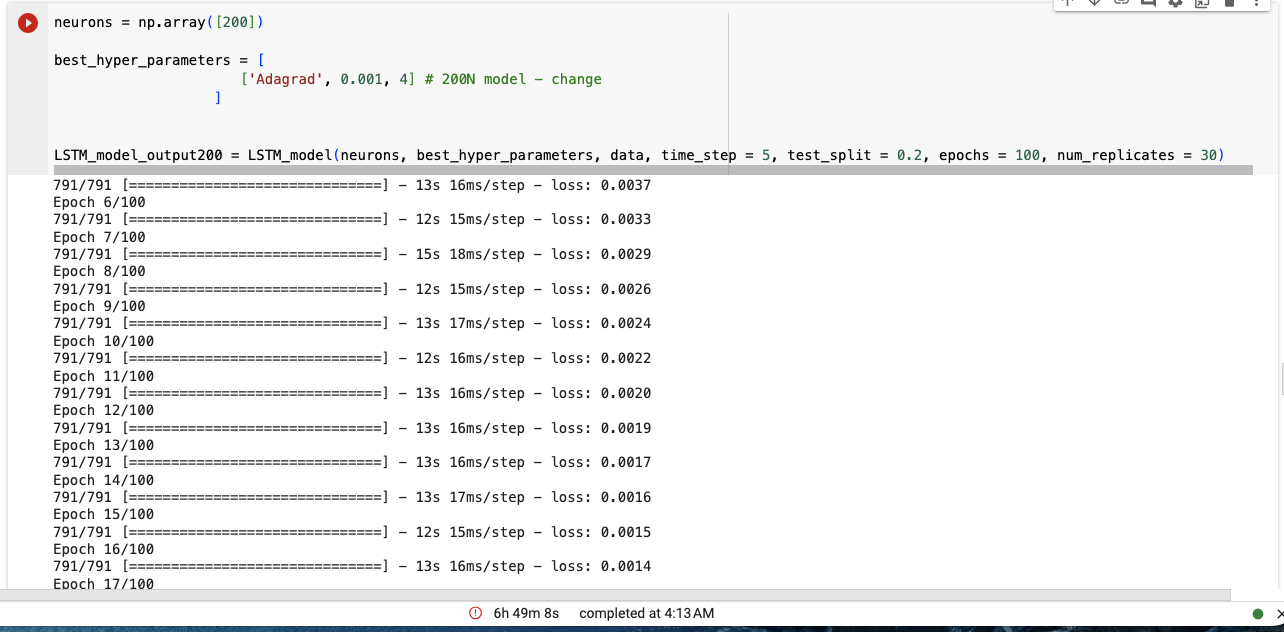

### Code if we were to run GRU with best models from nuerons 10,30,50,100,150,200

In [ ]:
#========== Model hyper parameters settting ==========================#
def GRU_model(neurons, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 20,  num_replicates = 2):

  #====== data transformation==========#
  print("Progress: Performing data preparation steps.......\n")

  #======= creating training and test data===#

  train_data, test_data = data_split(data, test_split)

  num_features = train_data.shape[1]

  min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
  min_test, max_test   =  test_data["Close"].min(), test_data["Close"].max()

  train_data_scaled  =  min_max_transform(train_data)
  test_data_scaled   = min_max_transform(test_data)


  X_train, y_train  =   DatasetCreation(train_data_scaled, time_step)
  X_test, y_test    =   DatasetCreation(test_data_scaled, time_step)

  y_train_original  =  min_max_inverse_transform(y_train, min_train, max_train) #in original scale
  y_test_original  =  min_max_inverse_transform(y_test, min_test, max_test) #in original scale


  print("Progress: Building and training models.......\n")

  neurons = np.array(neurons)
  #============ arrays for collecting test scores ================#
  rmse_array = np.zeros((len(neurons), num_replicates))
  #mae_array  = np.zeros((len(neurons), num_replicates))
  mape_array = np.zeros((len(neurons), num_replicates))
  #R2_array   = np.zeros((len(neurons), num_replicates))
  R_array    = np.zeros((len(neurons), num_replicates))
  elapsed_time_array = np.zeros((len(neurons), num_replicates))


  #========== array for collecting history and predictions =======#
  models_history = []
  train_predictions = []
  test_predictions  = []

  for i in range(len(neurons)):

    print("Model hyperparameters used: \n ", hyper_parameters[i])
    #========== saving history and predictions per replicate=====#
    model_history_per_replicate = []
    train_predictions_per_replicate = []
    test_predictions_per_replicate  = []

    hidden_nodes = np.int(neurons[i])

   # print("Program is running for %d neurons ----->\n" %np.int(neurons[i]))


    for k in range(num_replicates):

      print("Program is running for %d neurons and %d replicate ----->\n" %(hidden_nodes, k))



      layers = [hidden_nodes]


      model = build_model_GRU(layers, time_step, num_features, optimizer = hyper_parameters[i][0], learning_rate = hyper_parameters[i][1], verbose = 0)
      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
      # This callback will stop the training when there is no improvement in
      # the loss for three consecutive epochs
      start = time.time()
      history = model.fit(X_train, y_train, batch_size = hyper_parameters[i][2], epochs= epochs, callbacks=[callback], verbose = 1)
      end = time.time()
      elapsed_time = end - start

      model_history_per_replicate.append(history)


      #==============Making train and test prediction in original scales ==========
      train_pred   =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train) #in original scale
      test_pred    =  min_max_inverse_transform(model.predict(X_test).ravel(), min_test, max_test)

      train_predictions_per_replicate.append(train_pred)
      test_predictions_per_replicate.append(test_pred)

      #============== Calculating performance scores=========
      scores =   calculate_scores(min_max_inverse_transform(y_test, min_test, max_test),test_pred)
      rmse_array[i][k] = scores['rmse']
      mape_array[i][k] =  scores['mape']
      R_array[i][k] = scores['R']
      elapsed_time_array[i][k] = elapsed_time

    models_history.append(model_history_per_replicate)
    train_predictions.append(train_predictions_per_replicate)
    test_predictions.append(test_predictions_per_replicate)

  print("Progress: Collecting outputs.......\n")

  neurons_df = pd.DataFrame(neurons)
  rmse_df = pd.DataFrame(rmse_array)
  #mae_df  = pd.DataFrame(mae_array)
  mape_df  = pd.DataFrame(mape_array)
  #R2_df   = pd.DataFrame(R2_array)
  R_df    = pd.DataFrame(R_array)
  elapsed_time_df =  pd.DataFrame(elapsed_time_array)

  train_predictions  = np.array(train_predictions)
  test_predictions   = np.array(test_predictions)

  #==== Idendifying  the best model results based on rmse ===============#
  min_index = pd.DataFrame(rmse_df.min(axis = 1)).idxmin()[0]
  min_col =   pd.DataFrame(rmse_df.min(axis = 0)).idxmin()[0]

  num_neurons_with_best_rmse = neurons_df.loc[min_index,0]

  best_rmse = rmse_df.loc[min_index, min_col]
  #mae_with_best_rmse = mae_df.loc[min_index, min_col]
  mape_with_best_rmse = mape_df.loc[min_index, min_col]
  #R2_with_best_rmse = R2_df.loc[min_index, min_col]
  R_with_best_rmse =  R_df.loc[min_index, min_col]
  elapsed_time_with_best_rmse = elapsed_time_df.loc[min_index, min_col]

  train_predictions_with_best_rmse = train_predictions[min_index][min_col]
  test_predictions_with_best_rmse = test_predictions[min_index][min_col]

  loss_with_best_rmse = models_history[min_index][min_col].history['loss']
  #val_loss_with_best_rmse = models_history[min_index][min_col].history['val_loss']

  #======= Collecting hyperparameters=============#
  hyper_parameters = { 'neurons': neurons,
                       'model_specific_hyper_parameters': hyper_parameters,#additional best_hyper_parmeters for each models
                       'epochs': epochs,
                       'time_step':time_step,
                       'num_replicates': num_replicates,
                       'test_split':test_split
                       #'validataion_split':validation_split
                        }

  #======= Collecting test scores =============#
  scores = {'neurons': neurons_df, 'rmse': rmse_df, 'mape': mape_df, 'R': R_df, 'elapsed_time': elapsed_time_df}

  #======= Collecting average test scores =============#
  avg_scores = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.mean(axis = 1),
                            'mape': mape_df.mean(axis = 1),
                            'R': R_df.mean(axis = 1),
                            'elapsed_time': elapsed_time_df.mean(axis = 1)})

 #======= Collecting average test scores =============#
  all_stds = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.std(axis = 1),
                            'mape': mape_df.std(axis = 1),
                            'R': R_df.std(axis = 1),
                            'elapsed_time': elapsed_time_df.std(axis = 1)})
  #======= Collecting average test scores =============#
  all_minimums = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.min(axis = 1),
                            'mape': mape_df.min(axis = 1),
                            'R': R_df.min(axis = 1),
                            'elapsed_time': elapsed_time_df.min(axis = 1)})

  #======= Collecting average test scores =============#
  all_maximums = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.max(axis = 1),
                            'mape': mape_df.max(axis = 1),
                            'R': R_df.max(axis = 1),
                            'elapsed_time': elapsed_time_df.max(axis = 1)})



  #======= Collecting the best model results =============#
  model_with_best_rmse = {  'neurons': num_neurons_with_best_rmse,
                            'replicate': min_col,
                            'rmse': best_rmse,
                            'mape': mape_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            'loss':loss_with_best_rmse,

                         }

  datasets  =    {'data': data,
                  'X_train': X_train,
                  'X_test': X_test,
                  'y_train': y_train_original,
                  'y_test': y_test_original
                  }

  #======= Collecting all the outputs together =============#
  output_dictionary = { 'hyper_parameters': hyper_parameters,
                        'best_model': model_with_best_rmse,
                        'scores': scores,
                        'avg_scores': avg_scores,
                        'all_stds': all_stds,
                        'all_minimums': all_minimums,
                        'all_maximums': all_maximums,
                        'train_predictions': train_predictions,
                        'test_predictions':  test_predictions,
                        'models_history': models_history,
                        'datasets': datasets
                       }

  print("\nBest model (neurons, replicate, rmse): ", num_neurons_with_best_rmse, min_col, best_rmse)
  print('\nAverage scores:\n', avg_scores)
  print('\nStandard_deviations:\n', all_stds)
  print('\nMinimums:\n', all_minimums)
  print('\nMaximums:\n', all_maximums)
  print("\nProgress: All works are done successfully, congratulations!!\n")



  #Save all rmses in a file for statistical study
  scores['rmse'].to_csv(output_dir_path+'sl-lstm-all-rmse.csv')

  #writing output dictionary in the file
  file_name = output_dir_path + "sl-lstm-results.txt"
  write_dic_to_file(output_dictionary, file_name)

  return (output_dictionary)

In [ ]:
neurons = np.array([10, 30, 50, 100, 150,200])

best_hyper_parameters = [['Adam', 0.1, 16],# 10N model
                      ['Adagrad', 0.01, 8], # 30N model
                      ['Adagrad', 0.01, 4], # 50N model
                      ['Adagrad', 0.01, 16], # 1000N model
                      ['Adagrad', 0.01, 16], # 150N model
                      ['Adagrad', 0.001, 4] # 200N model
                   ]


GRU_model_output = GRU_model(neurons, best_hyper_parameters, data, time_step = 5, test_split = 0.2,epochs = 100, num_replicates = 30)


### Ranking of Models

***The model with the lowest RMSE value is considered the best model as a lower RMSE indicates a closer/better fit to the data.***

*Between 10 and 30:* best_model': {'**neurons': 30**, 'replicate': 1, '**rmse': 48.790905973164726**, 'mape': 1.0896850780125567, 'R': 0.9962652291457981, 'elapsed_time': 264.5078580379486,

*Between 50 and 100* : 'best_model': {'**neurons': 100**, 'replicate': 17, **'rmse': 47.0755997396777**2, 'mape': 0.9918504415730236, 'R': 0.9964837722242789, 'elapsed_time': 144.8073010444641,

Between 150 and 200 :

*   150: Best model (neurons, replicate, rmse):  150 2 46.97669565138481
*   200:
*   Best of the 2:



The Best Model is 150N using Optimizer:Adagrad',Learning Rate:0.01, and BatchSize: 16. This model produced the lowest RMSE at 46.98. Additionally models in 150N had the smalled range of RMSE. As well as models had the highest average r values and lowest average mape value

## Model Predicition

Combine the files we have to create the file that would have been created if all 6 nuerons could run at once.

For the overall best model, plot the prediction plot with true values and get other visualization as in the paper.

paper is set for single layer and multi layer but as we are only using single layer the below code has been altered.

In [ ]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_df_from_file(file_name):
    return pd.read_csv(file_name)

def comparative_qq_plots(data1):
    fig = plt.figure(figsize=(7,5))
    ax1 = fig.add_subplot(111)
    scipy.stats.probplot(data1, dist=scipy.stats.norm, sparams=(0,1), plot=ax1)
    ax1.get_lines()[0].set_marker('o')
    ax1.get_lines()[0].set_markerfacecolor('mediumblue')
    ax1.get_lines()[0].set_markersize(8.0)
    ax1.get_lines()[1].set_linewidth(3.0)
    plt.title("(a)")
    fig.savefig(output_dir_path + "Errors_QQ_Plots.png", dpi=600)
    plt.show()

def comparative_boxplots(data1):
    fig = plt.figure(figsize=(6,4))
    p = plt.boxplot(data1, patch_artist=True)
    p['boxes'][0].set(color='blue', linewidth=1.2)
    p['boxes'][0].set(facecolor='mediumblue')
    plt.xticks([1], ['Single-layer LSTM'])
    plt.ylabel('RMSE')
    fig.savefig(output_dir_path + "comparative_boxplots.png", dpi=600)
    plt.show()

def perform_normality_test(data1):
    print("Performaing Normality Test\n")
    print("Data1: ")
    print(scipy.stats.normaltest(data1))

def perform_statistical_analysis(data1):
    comparative_qq_plots(data1)
    comparative_boxplots(data1)
    perform_normality_test(data1)



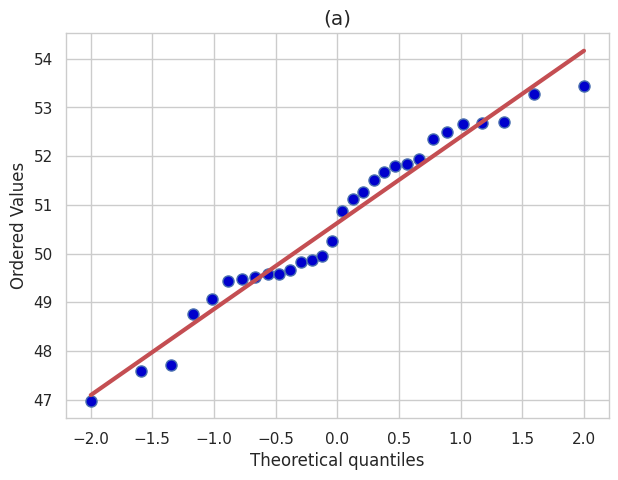

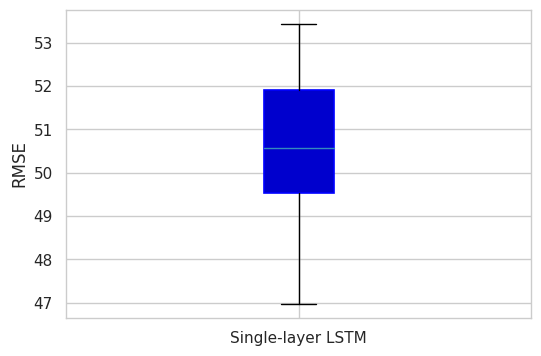

Performaing Normality Test

Data1: 
NormaltestResult(statistic=1.3040423617888097, pvalue=0.520991693416423)


In [ ]:
sl_index = 0 #because in this file only 50 and 100 so (0: 50N, 1: 100N)

final_rsme = read_df_from_file(output_dir_path+'150sl-lstm-all-rmse.csv')

data1 = final_rsme.iloc[sl_index,1:]


perform_statistical_analysis(data1)

Code for Combined

In [ ]:
import pandas as pd

# Read individual RMSE files
rmse_1030 = pd.read_csv(output_dir_path + '1030lstm-all-rmse.csv')
rmse_50100 = pd.read_csv(output_dir_path + '50100sl-lstm-all-rmse2.csv')
rmse_150 = pd.read_csv(output_dir_path + '150sl-lstm-all-rmse.csv')  # assuming this is complete
rmse_200 = pd.read_csv(output_dir_path + '150sl-lstm-all-rmse.csv') #Never able to run successfully so rmse_150 used t show code still functional

# Combine them
combined_rmse = pd.concat([rmse_1030, rmse_50100, rmse_150, rmse_200], axis=0)

# Save the combined file
combined_rmse.to_csv(output_dir_path + 'combined-sl-lstm-all-rmse.csv', index=False)


In [ ]:
combined_rmse.head(6)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
index,,,,,,,,,,,,,,,,,,,,,
0,62.166369,53.182757,68.219625,62.279613,88.989689,65.735047,56.712807,55.387134,84.190775,62.361945,...,65.079661,54.399252,78.489306,115.207336,66.448544,62.494215,109.837886,60.356472,80.712074,93.688582
1,56.976312,48.790906,60.673009,79.319914,73.378081,71.120668,67.228450,69.920173,70.126040,70.484758,...,52.412970,66.818565,71.375797,67.565013,71.064227,77.449664,51.868519,71.643488,86.934428,53.673409
2,52.866485,64.336383,56.772773,58.659939,55.874244,57.955031,53.124501,62.167442,48.437709,53.454201,...,56.727914,57.224974,54.376801,62.669572,56.929193,54.373585,53.772599,56.279990,57.096821,59.443884
3,50.578934,58.023378,51.557592,57.773459,59.084879,54.942925,58.123506,58.319557,51.900575,51.100877,...,49.272657,53.977436,52.370591,51.095310,55.439485,57.273157,54.293589,56.995968,51.122866,54.337268
4,49.473403,49.958120,46.976696,49.071468,49.580186,49.666385,52.671781,51.677769,48.751644,52.696009,...,51.838948,50.256194,52.489190,47.714464,49.426768,52.344693,51.508270,53.269551,51.114194,52.654606
5,49.473403,49.958120,46.976696,49.071468,49.580186,49.666385,52.671781,51.677769,48.751644,52.696009,...,51.838948,50.256194,52.489190,47.714464,49.426768,52.344693,51.508270,53.269551,51.114194,52.654606


In [ ]:
combined_rmse['Unnamed: 0'] = range(0, len(combined_rmse))

In [ ]:
combined_rmse = combined_rmse.rename(columns={'Unnamed: 0': 'index'})
combined_rmse = combined_rmse.set_index('index')

In [ ]:
def perform_statistical_analysis(dataframe): #chatgbt modified
    labels = {0: '10N', 1: '30N', 2: '50N', 3: '100N', 4: '150N', 5: '200N'}
    for index in dataframe.index:
        data_row = dataframe.loc[index, :].values  # Get numpy array
        label = labels.get(index, str(index))

        # Create a combined figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

        # QQ plot
        scipy.stats.probplot(data_row, dist=scipy.stats.norm, sparams=(0,1), plot=ax1)
        ax1.get_lines()[0].set_marker('o')
        ax1.get_lines()[0].set_markerfacecolor('mediumblue')
        ax1.get_lines()[0].set_markersize(8.0)
        ax1.get_lines()[1].set_linewidth(3.0)
        ax1.set_title(f"QQ Plot for {label}")

        # Boxplot
        p = ax2.boxplot(data_row, patch_artist=True)
        p['boxes'][0].set(color='blue', linewidth=1.2)
        p['boxes'][0].set(facecolor='mediumblue')
        ax2.set_xticks([1])
        ax2.set_xticklabels([label])
        ax2.set_ylabel('RMSE')
        ax2.set_title(f"Boxplot for {label}")

        plt.show()

        # Perform and display the normality test
        perform_normality_test(data_row, label)

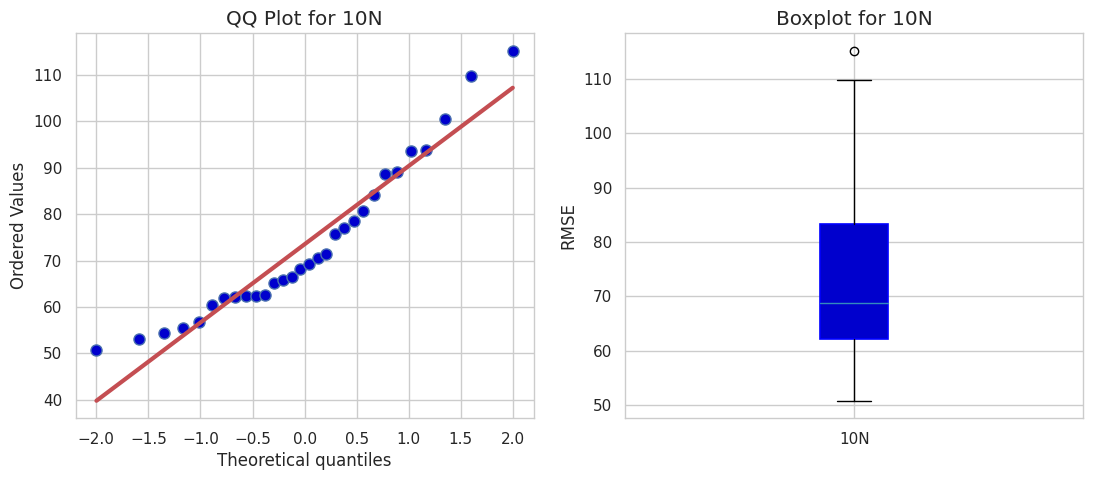

Performing Normality Test for 10N

10N: 
NormaltestResult(statistic=4.4242618599242745, pvalue=0.10946713300768343)




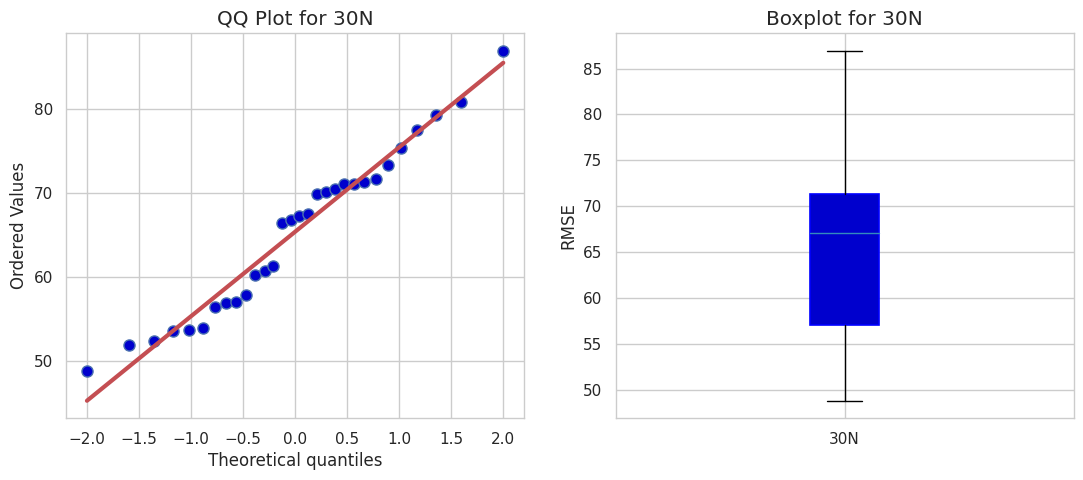

Performing Normality Test for 30N

30N: 
NormaltestResult(statistic=1.3421930831001896, pvalue=0.511147775597103)




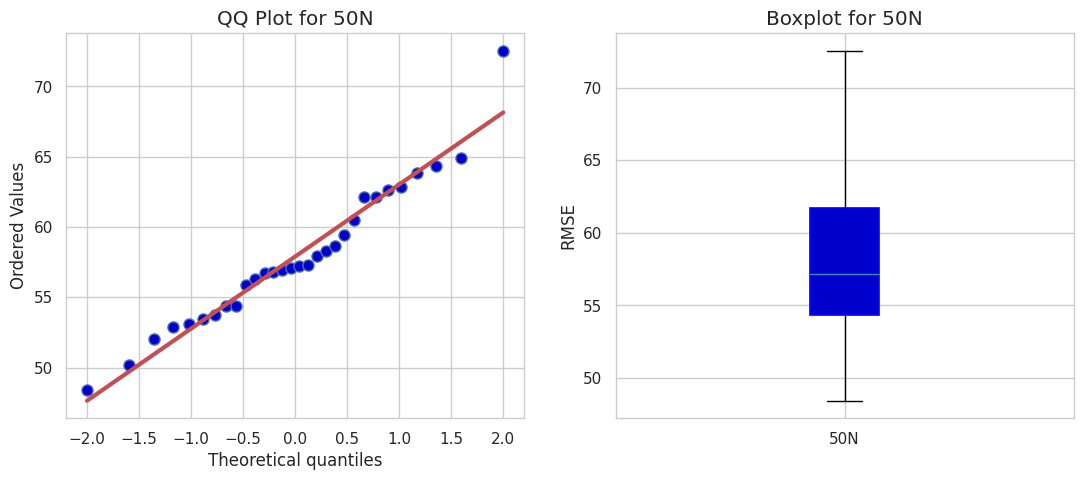

Performing Normality Test for 50N

50N: 
NormaltestResult(statistic=4.313414519416599, pvalue=0.11570548258298098)




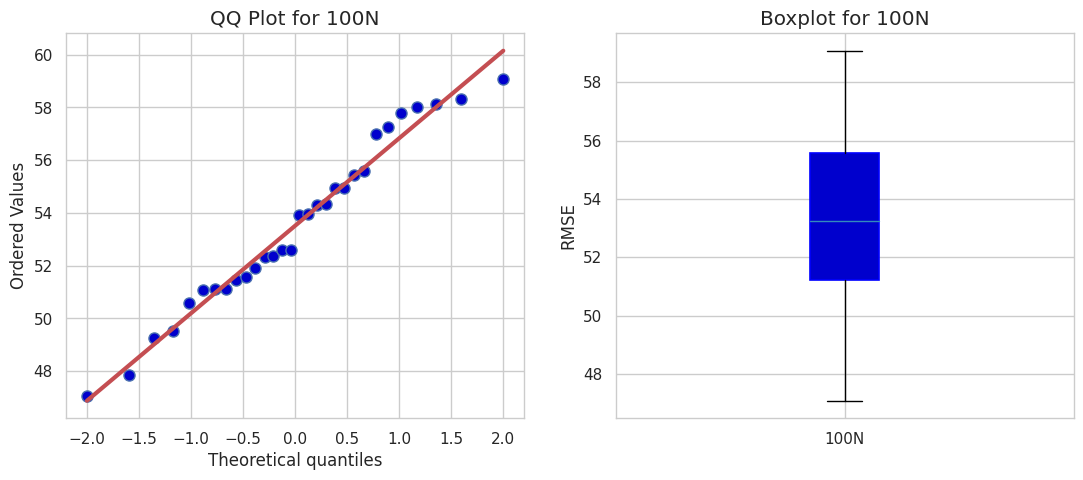

Performing Normality Test for 100N

100N: 
NormaltestResult(statistic=1.129809652815883, pvalue=0.5684142422084786)




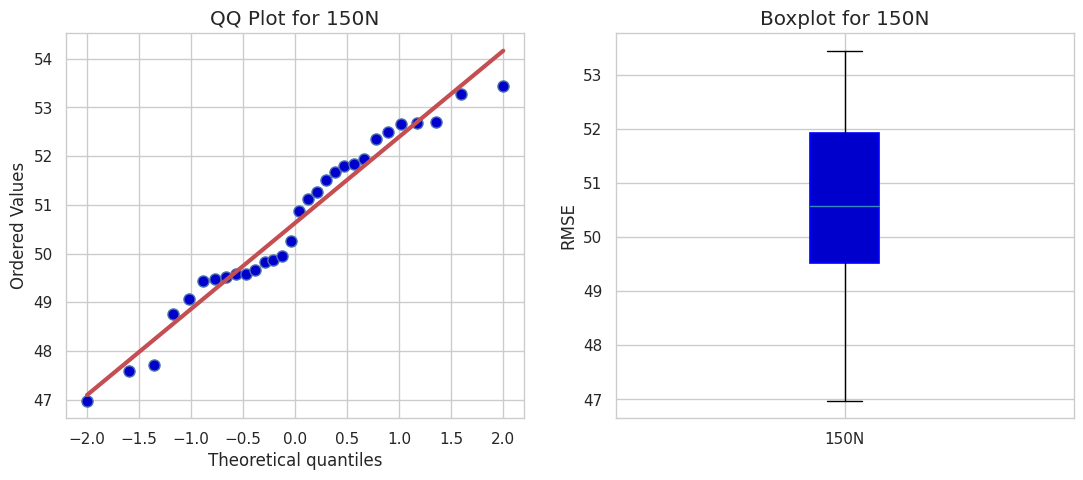

Performing Normality Test for 150N

150N: 
NormaltestResult(statistic=1.3040423617888097, pvalue=0.520991693416423)




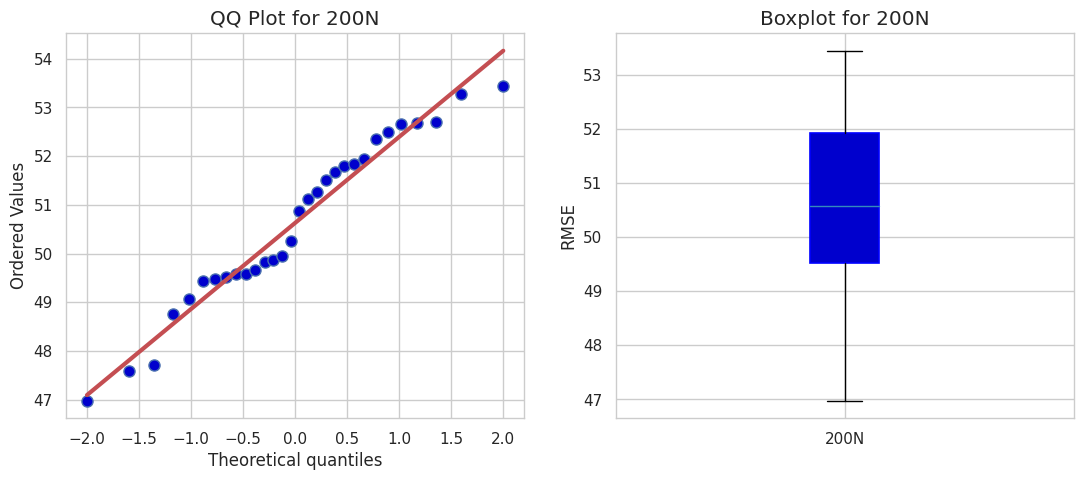

Performing Normality Test for 200N

200N: 
NormaltestResult(statistic=1.3040423617888097, pvalue=0.520991693416423)




In [ ]:

perform_statistical_analysis(combined_rmse)

## Compare to LSTM Paper

Our Best Model

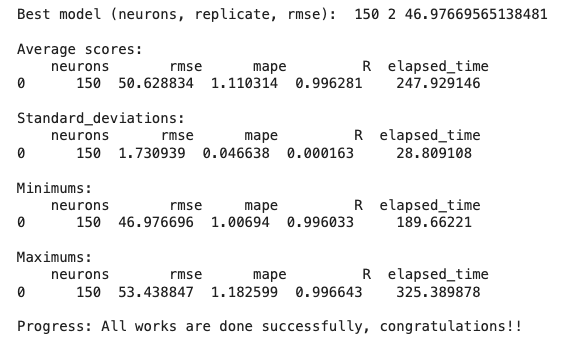

Best Model from Paper


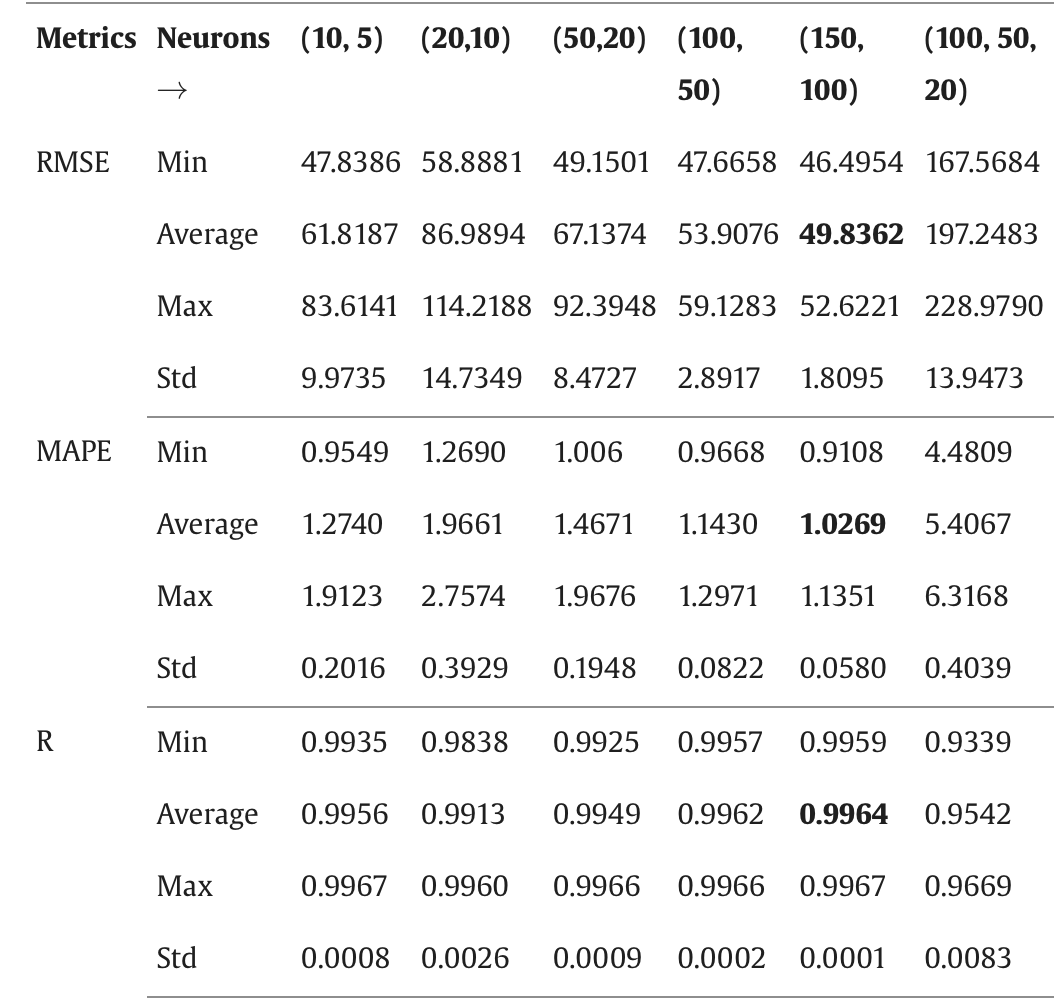

**RMSE)**
In both the paper and our project 150N provides the best results. The average rmse from the paper (49.84) is better than our project(50.63). Additionally the papers min and max rmse are lower than our projects. However our rmse model has a lower standard deviaiton(1.7309) than the papers model(1.8095).

**MAPE**)
The paper has a better average MAPE (1.0269) than our model (1.110). Similarly to the RMSE, the paper has a smaller min and max but a larger standard devation than our model.

**r)**
The average,min,max,std r for the paper was 0.9964,0,9959,0.9967,0.0001 and for our model was 0.9963,0.9960,0.9966,0.0002. In this case the papers r is only slightly better than our model.

Therefore the paper constructed a better model than we did in this project